In [198]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def get_ab(X, y, a, b):
    # Filter the data for classes a and b
    idx = np.where((y == a) | (y == b))[0]
    X_ab = X[idx]
    y_ab = y[idx]
    # Convert labels to binary (0 and 1)
    y_ab = np.where(y_ab == a, -1, 1)
    return X_ab, y_ab

def get_mnist_data(a, b):
    # Load the .mat file
    data = loadmat('data/mnist.mat')

    # Extract and process training data
    X = data['trainX'].astype(np.float64)
    y = data['trainY'][0, :].astype(np.float64)  # column vector
    X, y = get_ab(X, y, a, b)

    # Extract and process test data
    Xt = data['testX'].astype(np.float64)
    yt = data['testY'][0, :].astype(np.float64)  # column vector
    Xt, yt = get_ab(Xt, yt, a, b)

    # Normalize the data (if not, trajectory doesn't converge)
    X = X / 255.
    Xt = Xt / 255.

    return X, y, Xt, yt


class LogisticRegression:
    def __init__(self, A, b):
        self.A = A
        self.b = b
    
    def get_bA(A, b):
        bA = (b[:, np.newaxis] * A)
        return bA
    
    def fn(x, bA):
        return np.mean(-np.log(sigmoid(bA @ x)))

    def grad(x, bA):
        m = bA.shape[0]
        return (bA.T @ (sigmoid(bA @ x) - 1)) / m

    def predict(self, x):
        return sigmoid(self.A @ x)

    def accuracy(self, x, y):
        y_pred = np.round(self.predict(x))
        return np.mean(np.sign(y_pred) == np.sign(y))
    
    
def logistic_regression_classification(A, b):
    bA = LogisticRegression.get_bA(A, b)
    m, n = A.shape
    fn = lambda x: LogisticRegression.fn(x, bA)
    grad = lambda x: LogisticRegression.grad(x, bA)
    return fn, grad, m, n

In [199]:
# ----------- Logistic Regression Problems ----------- %
num1 = 4; num2 = 9
A, b, At, bt = get_mnist_data(num1, num2)
fn, grad, m, n = logistic_regression_classification(A, b)

In [200]:
# ----------- Initialization ----------- 
stepsize = 0.1
num_iter = 200
iter_limit = 10
p = 5
B = np.eye(n)
x0 = np.zeros((n, 1))
f0 = fn(x0) 
lambda_ = 0.0001
theta_ls = np.linalg.solve(A.T @ A + lambda_ * np.eye(A.shape[1]), A.T @ b)  # Solution
y_est = A @ theta_ls  # Compute y_est for training data
#f_ls = np.mean(-np.log(sigmoid(y_est)))  # Compute loss for training data

In [201]:
traj_opt = np.full(num_iter, np.inf)
x = x0+0.
x_opt = x0+0.
f_optimal = np.inf

In [202]:
for iter in range(num_iter):
    if iter == 0:
        xn = x - grad(x) * stepsize
    else:
        B = B + (y @ y.T) / (y.T @ s) - ((B @ s) @ (B @ s).T) / (s.T @ B @ s)
        xn = x - np.linalg.solve(B, grad(x)) * stepsize

    s = xn - x
    y = grad(xn) - grad(x)

    x = xn
    traj_opt[iter] = fn(x)

    print(traj_opt[iter])
    if fn(x) < f_optimal:
        x_opt = x
        f_optimal = traj_opt[iter]

    # stopping criteria
    if fn(x) < 1e-14:
        traj_opt[iter + 1:num_iter] = fn(x)
        break

0.6558444908833674
0.5515795713590774
0.4970659908482247
0.45874358405210874
0.4244548485521027
0.39407044426510845
0.3670088959783385
0.3427810515280757
0.3209904141793648
0.30131578989045626
0.28349424426382897
0.267307821814721
0.2525736207212484
0.23913641246576206
0.22686311686400992
0.21563861942024187
0.20536256356659244
0.19594685725925717
0.18731370889782964
0.17939406016584164
0.17212632006647494
0.1654553301571733
0.15933150924108053
0.1537101388988671
0.1485507608078518
0.14381666383821917
0.13947444413832943
0.13549362530511408
0.13184632862783977
0.1285069855534097
0.12545208614724712
0.12265995856569213
0.1201105755216473
0.11778538448633959
0.11566715896911021
0.11373986867769302
0.11198856669819643
0.11039929206086971
0.10895898619231577
0.10765542181914636
0.10647714290667692
0.10541341421301435
0.10445417903428811
0.10359002372624683
0.10281214762097668
0.10211233702016594
0.10148294203927072
0.10091685519824373
0.10040749080004228
0.09994876430207102
0.0995350710608

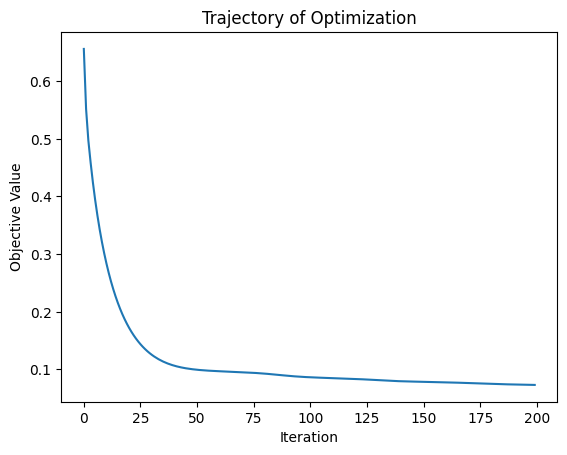

In [203]:
# plot the trajectory of the optimization
plt.plot(traj_opt)
plt.xlabel('Iteration')
plt.ylabel('Objective Value')
plt.title('Trajectory of Optimization')
plt.show()

In [204]:
# ----------- Initialization ----------- 
stepsize = 0.1
num_iter = 200
iter_limit = 10
p = 5
B = np.eye(n)
x0 = np.zeros((n, 1))
f0 = fn(x0) 
lambda_ = 0.0001
theta_ls = np.linalg.solve(A.T @ A + lambda_ * np.eye(A.shape[1]), A.T @ b)  # Solution
y_est = A @ theta_ls  # Compute y_est for training data
#f_ls = np.mean(-np.log(sigmoid(y_est)))  # Compute loss for training data

In [205]:
# Gradient Descent
x = x0 + 0.
f = f0 + 0.
traj = np.full(num_iter, np.inf)

for i in range(num_iter):
    g = grad(x)
    x = x - stepsize * g    
    traj[i] = fn(x)

    if traj[i] < 1e-14:
        traj[i + 1:num_iter] = traj[i]
        break
    

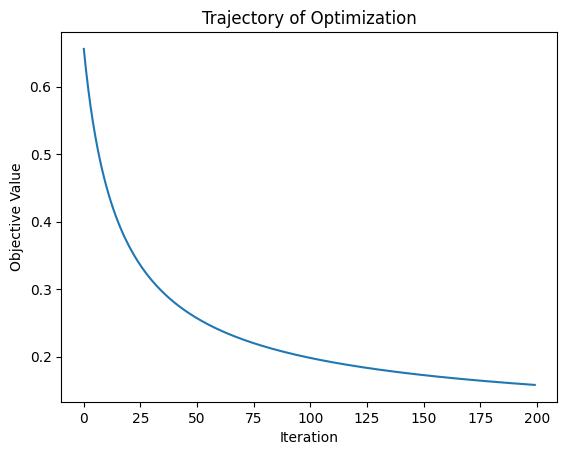

In [206]:
# plot the trajectory of the optimization
plt.plot(traj)
plt.xlabel('Iteration')
plt.ylabel('Objective Value')
plt.title('Trajectory of Optimization')
plt.show()

In [207]:
print(traj)

[0.65584449 0.62362832 0.59531759 0.57025379 0.54790435 0.52783991
 0.50971421 0.4932468  0.47820908 0.46441333 0.45170413 0.43995172
 0.42904693 0.41889717 0.40942336 0.40055745 0.39224059 0.3844215
 0.37705531 0.37010254 0.36352827 0.35730154 0.3513947  0.34578307
 0.34044447 0.3353589  0.33050834 0.32587645 0.32144837 0.31721059
 0.31315078 0.30925767 0.30552092 0.30193102 0.29847926 0.29515758
 0.29195856 0.28887531 0.28590148 0.28303116 0.28025887 0.27757951
 0.27498833 0.2724809  0.27005308 0.26770102 0.26542108 0.26320988
 0.26106425 0.2589812  0.25695791 0.25499177 0.25308027 0.25122109
 0.24941201 0.24765095 0.24593594 0.24426512 0.24263672 0.24104909
 0.23950063 0.23798985 0.23651532 0.2350757  0.23366969 0.23229609
 0.23095372 0.22964148 0.22835831 0.22710322 0.22587523 0.22467344
 0.22349698 0.222345   0.22121672 0.22011136 0.2190282  0.21796654
 0.21692571 0.21590507 0.214904   0.21392191 0.21295824 0.21201245
 0.21108401 0.21017242 0.2092772  0.20839788 0.20753403 0.20668

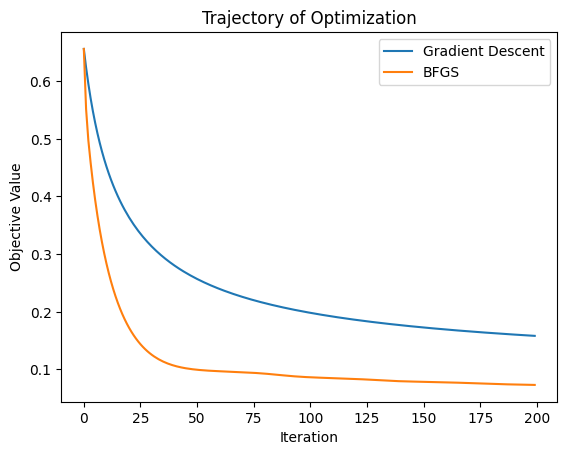

In [208]:
# plot two trajectories
plt.plot(traj, label='Gradient Descent')
plt.plot(traj_opt, label='BFGS')
plt.xlabel('Iteration')
plt.ylabel('Objective Value')
plt.title('Trajectory of Optimization')
plt.legend()
plt.show()

In [209]:
def get_l_ms_bfgs_2loop(Sk, Yk, gk):
    
    q = gk
    m = len(Sk)
    alpha = [None] * m
    Winv = [None] * m

    for i in range(m):
        L = Yk[i].shape[1]
        Winv[i] = np.linalg.inv(Yk[i].T @ Sk[i])

    for j in range(m - 1, -1, -1):
        alpha[j] = Winv[j].T @ (Sk[j].T @ q)
        q = q - Yk[j] @ alpha[j]

    s_km1 = Sk[-1][:, -1]
    y_km1 = Yk[-1][:, -1]
    gamma = (y_km1.T @ s_km1) / (y_km1.T @ y_km1)
    r = gamma * q

    for j in range(m):
        beta = Winv[j] @ (Yk[j].T @ r)
        r = r + Sk[j] @ (alpha[j] - beta)

    return r

In [212]:
traj_opt_MS = np.full(num_iter, np.inf)
smem = np.array([]); Sk = []
ymem = np.array([]); Yk = []
x = x0 + 0.
x_opt = x0 + 0. 
f_optimal = np.inf

for iter in range(num_iter):    
    if iter == 0:
        xn = x - grad(x) * stepsize
    else:
        Bg = get_l_ms_bfgs_2loop(Sk, Yk, grad(x))
        xn = x - Bg * stepsize

    s = xn - x
    y = grad(xn) - grad(x)

    if iter ==0 :
        smem = s; ymem = y
    else:
        smem = np.hstack((smem, s))
        ymem = np.hstack((ymem, y))

    # simplest multisecant
    if smem.shape[1] > p:
        smem = smem[:, 1:]
        ymem = ymem[:, 1:]

    x = xn
    traj_opt_MS[iter] = fn(x)

    if fn(x) < f_optimal:
        x_opt = x
        f_optimal = traj_opt_MS[iter]

    # Save Sk and Yk 
    Sk.append(smem.copy()) # list
    Yk.append(ymem.copy()) # list

    if len(Sk) > p:
        Sk.pop(0)
        Yk.pop(0)

    # stopping criteria
    if fn(x) < 1e-14:
        traj_opt_MS[iter + 1:max_iter] = fn(x)
        break

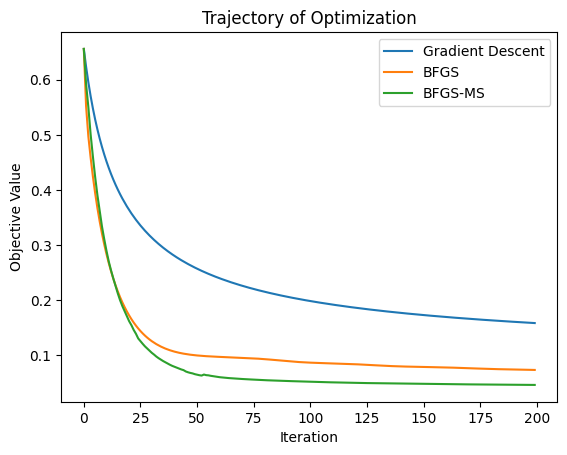

In [213]:
# plot two trajectories
plt.plot(traj, label='Gradient Descent')
plt.plot(traj_opt, label='BFGS')
plt.plot(traj_opt_MS, label='BFGS-MS')
plt.xlabel('Iteration')
plt.ylabel('Objective Value')
plt.title('Trajectory of Optimization')
plt.legend()
plt.show()